# Previsão de Preços de Imóveis com Análise de Dados e Machine Learning

## 1. Introdução

Este notebook apresenta um projeto de análise de dados e machine learning focado na previsão de preços de imóveis. O objetivo é demonstrar como a aplicação de técnicas de ciência de dados pode auxiliar na compreensão e solução de problemas do mundo real, utilizando dados públicos e não confidenciais.

## 2. Coleta de Dados

O dataset utilizado neste projeto é o "Housing Prices Dataset" disponível no Kaggle. Ele contém informações sobre diversas características de imóveis que podem influenciar seus preços. Para facilitar a execução no Google Colab, o dataset será carregado diretamente de um arquivo CSV.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('Housing.csv')

# Exibir as primeiras linhas do dataset
print('Primeiras 5 linhas do dataset:')
print(df.head())

# Exibir informações gerais do dataset
print('Informações gerais do dataset:')
print(df.info())

# Exibir estatísticas descritivas
print('Estatísticas descritivas do dataset:')
print(df.describe())

Primeiras 5 linhas do dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>

## 3. Análise Exploratória de Dados (EDA)

Nesta seção, realizaremos uma análise exploratória para entender a estrutura dos dados, identificar padrões, anomalias e relações entre as variáveis. Isso nos ajudará a preparar os dados para a modelagem.

Valores ausentes por coluna:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


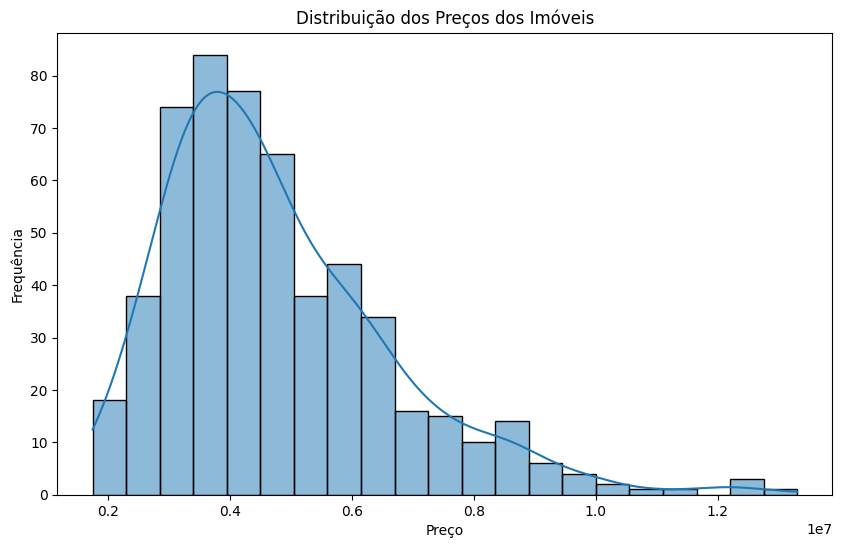

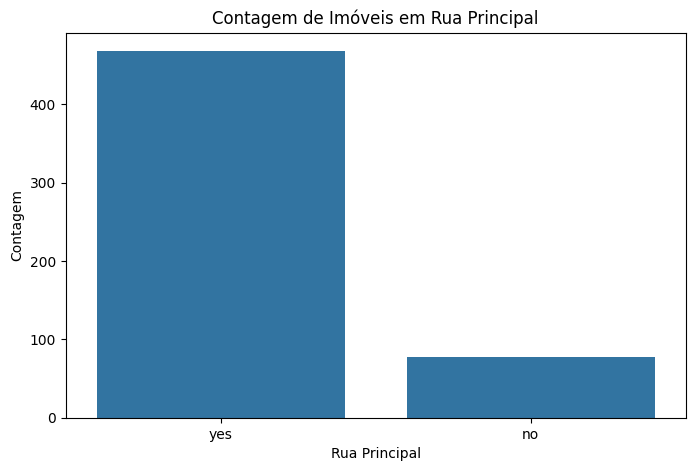

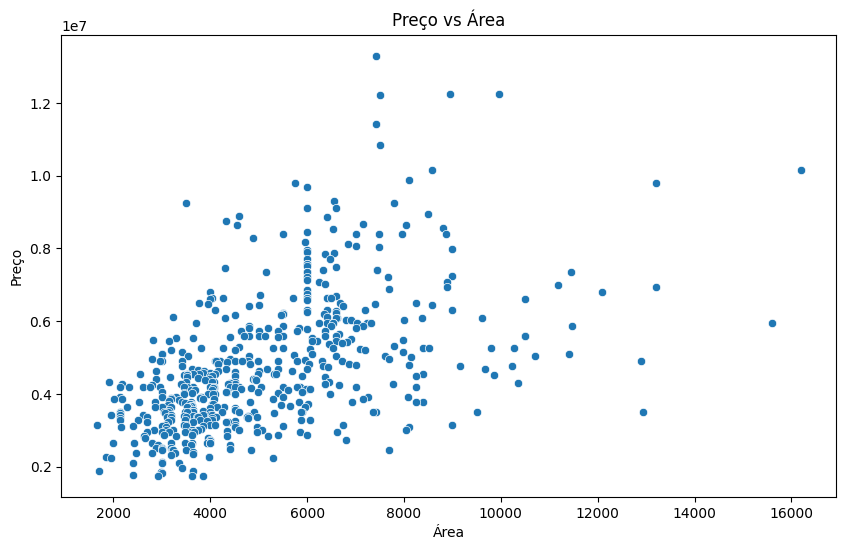

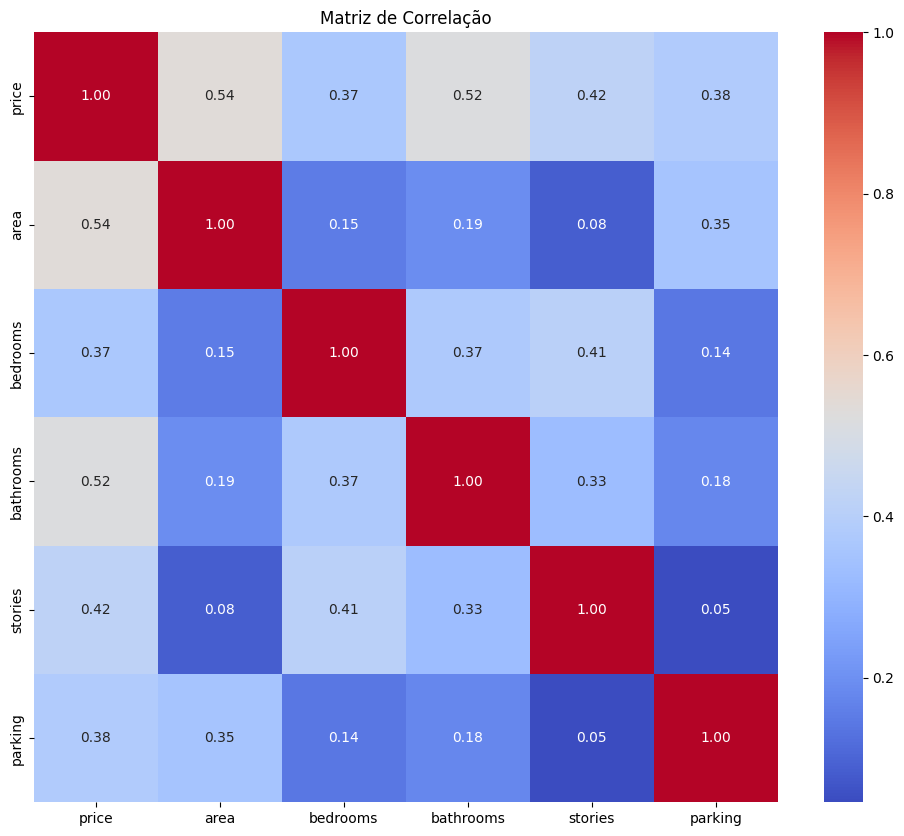

In [2]:
# Verificar valores ausentes
print('Valores ausentes por coluna:')
print(df.isnull().sum())

# Verificar a distribuição da variável alvo (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Análise de variáveis categóricas
# Exemplo: 'mainroad'
plt.figure(figsize=(8, 5))
sns.countplot(x='mainroad', data=df)
plt.title('Contagem de Imóveis em Rua Principal')
plt.xlabel('Rua Principal')
plt.ylabel('Contagem')
plt.show()

# Relação entre variáveis numéricas e a variável alvo
# Exemplo: 'area' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Preço vs Área')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.show()

# Matriz de correlação para variáveis numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## 4. Pré-processamento de Dados

Nesta etapa, prepararemos os dados para a modelagem, lidando com variáveis categóricas e escalonando variáveis numéricas, se necessário.

In [3]:
# Identificar variáveis categóricas
categorical_cols = df.select_dtypes(include='object').columns
print(f'Variáveis categóricas: {list(categorical_cols)}')

# Aplicar One-Hot Encoding para variáveis categóricas
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Exibir as primeiras linhas do dataset processado
print('Primeiras 5 linhas do dataset processado:')
print(df_processed.head())

Variáveis categóricas: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Primeiras 5 linhas do dataset processado:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4 

## 5. Construção e Avaliação do Modelo de Machine Learning

Utilizaremos um modelo de Regressão Linear para prever os preços dos imóveis. O dataset será dividido em conjuntos de treino e teste para avaliar a performance do modelo.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir variáveis preditoras (X) e variável alvo (y)
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 1754318687330.66
R-squared (R2): 0.65


## 6. Visualização dos Resultados

Para visualizar os resultados do modelo, compararemos os preços reais com os preços previstos.

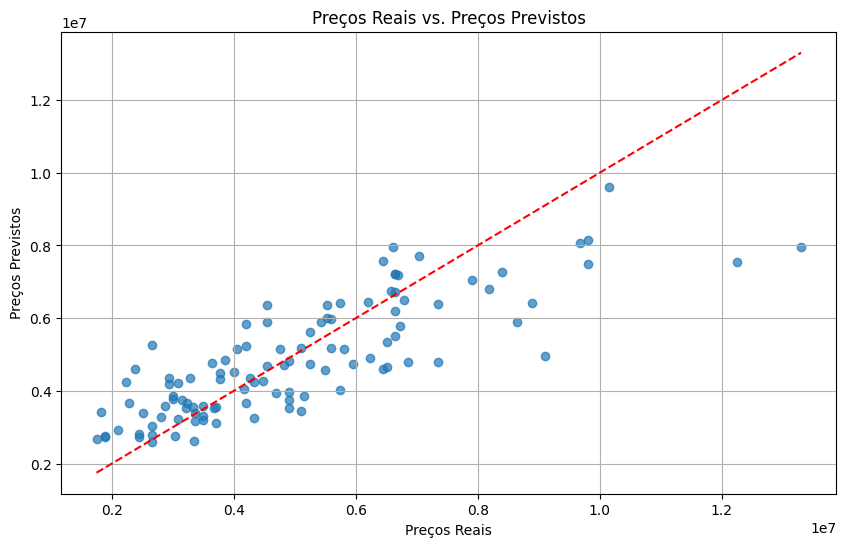

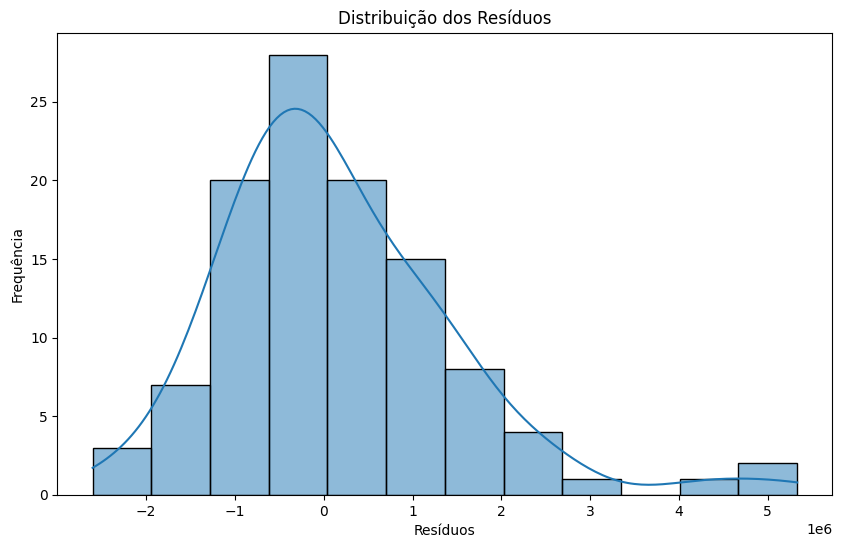

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title('Preços Reais vs. Preços Previstos')
plt.grid(True)
plt.show()

# Resíduos do modelo
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

## 7. Conclusões

Este projeto demonstrou a aplicação de técnicas de análise de dados e machine learning para prever preços de imóveis. O modelo de Regressão Linear apresentou um desempenho razoável, como indicado pelas métricas de avaliação e visualizações. Para melhorias futuras, poderíamos explorar:

*   **Engenharia de Features**: Criar novas variáveis a partir das existentes.
*   **Outros Modelos**: Experimentar modelos mais complexos como Random Forest, Gradient Boosting, ou redes neurais.
*   **Otimização de Hiperparâmetros**: Ajustar os parâmetros do modelo para melhorar o desempenho.
*   **Validação Cruzada**: Utilizar validação cruzada para uma avaliação mais robusta do modelo.

Este trabalho serve como um ponto de partida para projetos mais aprofundados em previsão de preços de imóveis, destacando a importância da análise de dados na tomada de decisões.